In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score

In [51]:
df = pd.read_csv("train.csv")
df.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
6,20,0,2,1,3,1,0,0,1,0,...,3,0,0,10,0,1,0,0,1,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
8,26,0,5,1,3,1,0,0,0,1,...,4,2,1,5,0,1,0,0,0,1
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0


In [52]:
print("The shape of the DataFrame is: {}".format(df.shape))

The shape of the DataFrame is: (595212, 59)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

Let us see if there are any missing data in the data frame.

In [54]:
df.duplicated().sum()

0

In [55]:
missing_df = df[df.values  == -1]
missing_df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,4,3,8,0,1,0,0,0,0


In [56]:
missing_df.duplicated().sum()

376177

In [57]:
missing_df = missing_df.drop_duplicates()

In [58]:
missing_df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
5,19,0,5,1,4,0,0,0,0,0,...,4,2,0,9,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


We use simple listwise deletion method to remove all instances with missing data:

In [59]:
df = df.drop(df[df.values == -1].index)

In [60]:
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
13,43,0,1,1,3,1,0,0,1,0,...,2,0,4,3,0,0,1,0,1,0
17,58,0,5,1,6,0,1,1,0,0,...,9,1,3,9,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595198,1487990,0,5,1,7,1,0,0,0,0,...,6,2,2,14,0,1,1,0,0,0
595201,1487996,0,0,2,2,1,0,0,0,0,...,4,1,2,6,1,1,0,1,1,0
595202,1488001,0,4,1,3,0,0,0,1,0,...,11,6,2,6,0,1,1,0,1,0
595203,1488005,0,3,2,3,1,0,0,1,0,...,5,2,1,6,0,0,0,0,0,0


In [61]:
df[df['target'] == 0]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
7,22,0,5,1,4,0,0,1,0,0,...,7,1,3,6,1,0,1,0,1,0
13,43,0,1,1,3,1,0,0,1,0,...,2,0,4,3,0,0,1,0,1,0
17,58,0,5,1,6,0,1,1,0,0,...,9,1,3,9,0,1,1,0,0,0
22,72,0,5,3,6,1,3,0,1,0,...,8,1,3,5,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595198,1487990,0,5,1,7,1,0,0,0,0,...,6,2,2,14,0,1,1,0,0,0
595201,1487996,0,0,2,2,1,0,0,0,0,...,4,1,2,6,1,1,0,1,1,0
595202,1488001,0,4,1,3,0,0,0,1,0,...,11,6,2,6,0,1,1,0,1,0
595203,1488005,0,3,2,3,1,0,0,1,0,...,5,2,1,6,0,0,0,0,0,0


In [62]:
df[df['target'] == 1]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
9,28,1,1,1,2,0,0,0,1,0,...,3,5,0,6,0,1,0,0,1,0
108,285,1,0,1,3,0,0,1,0,0,...,9,2,5,7,0,0,0,0,0,0
251,630,1,0,1,8,1,0,1,0,0,...,4,1,1,8,1,0,1,0,0,0
266,685,1,1,1,3,1,0,0,1,0,...,6,0,2,9,0,0,1,0,1,1
518,1403,1,6,1,6,0,0,0,0,1,...,7,1,7,9,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594968,1487368,1,2,3,9,1,0,0,0,0,...,7,2,5,4,0,1,1,0,1,0
595006,1487473,1,5,1,7,0,3,0,0,1,...,10,1,5,7,0,1,1,0,0,0
595099,1487716,1,0,1,6,1,0,0,1,0,...,3,2,1,6,0,1,1,0,0,0
595113,1487748,1,0,2,2,0,0,1,0,0,...,5,0,4,4,0,0,1,0,1,0


# Prepare the Training and Testing Data

## i) No rebalancing techniques:

In [63]:
# Get the Dependent and Independent Features
X = df.drop(['target'], axis='columns')
y = df['target']

In [66]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 119261, 1: 5670})


### We leave 30% of the data for testing and reporting the scores. If using the same dataset when training and testing the model using 10-fold cross validation, the performance can seem to be better since it is very likely that the model has seen the test data while training and testing the other folds of the data. For more realistic performance scores, we leave out 30% of the testing data. We will do this in the rest of the sampling method.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## ii) Random Sampling to Balance Classes via Under-Sampling:

In [70]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=None, replacement=False)
X_rus, y_rus = rus.fit_resample(X, y)

In [71]:
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0: 5670, 1: 5670})


In [72]:
X_rusTrain, X_rusTest, y_rusTrain, y_rusTest = train_test_split(X_rus, y_rus, test_size=0.30, random_state=0)

## iii) Random Sampling to Balance Classes via Over-Sampling:

In [73]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=None)
X_ros, y_ros = ros.fit_resample(X, y)

In [74]:
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({0: 119261, 1: 119261})


In [75]:
X_rosTrain, X_rosTest, y_rosTrain, y_rosTest = train_test_split(X_ros, y_ros, test_size=0.30, random_state=0)

## iv) Undersampling: Cluster Centroids:

In [23]:
cc = ClusterCentroids(random_state=None)

In [24]:
X_cc, y_cc = cc.fit_resample(X, y)

MemoryError: Unable to allocate 5.04 GiB for an array with shape (119261, 5670) and data type float64

In [ ]:
print('Resampled dataset shape %s' % Counter(y_cc))

In [ ]:
X_ccTrain, X_ccTest, y_ccTrain, y_ccTest = train_test_split(X_cc, y_cc, test_size=0.30, random_state=0)

As we can see from the error message, local machine has not large enough RAM for running Clustering Centroids Undersampling method with the data. Therefore, we could not evaluate the results from Clustring Centroids Undersampling method for this data set. The later results will not be run as well.

## v) Undersampling: TomekLinks:

In [76]:
tl = TomekLinks()

In [77]:
X_tl, y_tl = tl.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_tl))

Resampled dataset shape Counter({0: 115858, 1: 5670})


In [78]:
X_tlTrain, X_tlTest, y_tlTrain, y_tlTest = train_test_split(X_tl, y_tl, test_size=0.30, random_state=0)

## vi) Oversampling: SMOTE:

In [79]:
sm = SMOTE(random_state=None)

In [80]:
X_sm, y_sm = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_sm))

Resampled dataset shape Counter({0: 119261, 1: 119261})


In [81]:
X_smTrain, X_smTest, y_smTrain, y_smTest = train_test_split(X_sm, y_sm, test_size=0.30, random_state=0)

## vii) Oversampling: ADASYN

In [82]:
ada = ADASYN(random_state=None)

In [83]:
X_ada, y_ada = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_ada))

Resampled dataset shape Counter({1: 119396, 0: 119261})


In [84]:
X_adaTrain, X_adaTest, y_adaTrain, y_adaTest = train_test_split(X_ada, y_ada, test_size=0.30, random_state=0)

## viii) Oversampling with undersampling: SMOTETomek

In [85]:
smt = SMOTETomek(random_state=None)

In [86]:
X_smt, y_smt = smt.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smt))

Resampled dataset shape Counter({0: 107150, 1: 107150})


In [87]:
X_smtTrain, X_smtTest, y_smtTrain, y_smtTest = train_test_split(X_smt, y_smt, test_size=0.30, random_state=0)

# Model Building

## Train the models with each of the prepared Training & Testing Datasets above (Use 10-folds cross validation):

## 1. Logistic Regression

### i) No rebalancing techniques:

In [37]:
kfold = StratifiedKFold(n_splits=10)
lr_clf = LogisticRegression(random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

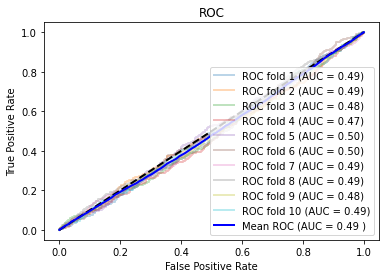

In [38]:
x  = X_train
y = y_train
for train,test in kfold.split(x,y):
    model = lr_clf.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [39]:
print(recalls)
print(np.mean(recalls))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [40]:
print(precisions)
print(np.mean(precisions))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [41]:
print(f1scores)
print(np.mean(f1scores))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [42]:
print(aucs)
print(np.mean(aucs))

[0.4902203278009598, 0.48664396003084953, 0.4828487252863173, 0.4672375108474073, 0.5009821505083044, 0.4977004703459945, 0.48650485975916646, 0.4921239719623637, 0.47882156680130017, 0.4862210898749167]
0.48693046332175804


Now we have the trained model, let use use test data to report the performance scores:

In [43]:
y_pred = lr_clf.predict(X_test)

In [44]:
scores_lr = classification_report(y_test, y_pred, labels=[0, 1])
auc_lr = roc_auc_score(y_test, y_pred)
print(scores_lr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35784
           1       0.00      0.00      0.00      1696

    accuracy                           0.95     37480
   macro avg       0.48      0.50      0.49     37480
weighted avg       0.91      0.95      0.93     37480



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
auc_lr

0.5

### ii) Random Sampling to balance classes via under-sampling:

In [88]:
kfold = StratifiedKFold(n_splits=10)
lr_rus = LogisticRegression(random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

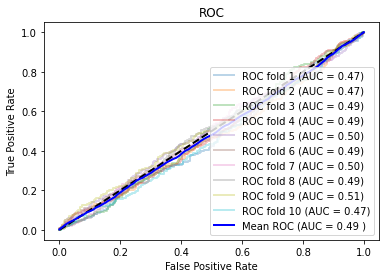

In [89]:
x  = X_rusTrain
y = y_rusTrain
for train,test in kfold.split(x,y):
    model = lr_rus.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [90]:
print(recalls)
print(np.mean(recalls))

[0.3282442748091603, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.03282442748091603


In [91]:
print(precisions)
print(np.mean(precisions))

[0.4607142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.04607142857142857


In [92]:
print(f1scores)
print(np.mean(f1scores))

[0.38335809806835064, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.03833580980683506


In [93]:
print(aucs)
print(np.mean(aucs))

[0.4685550754157862, 0.4692594214210022, 0.49297240359660643, 0.4860431618155629, 0.5040896486519071, 0.48834021815689777, 0.4990450083442793, 0.4939940225771449, 0.5070547073791349, 0.46618320610687025]
0.4875536873465192


Now we have the trained model, let use use test data to report the performance scores:

In [94]:
y_rusPred = lr_rus.predict(X_rusTest)

In [95]:
scores_lr_rus = classification_report(y_rusTest, y_rusPred, labels=[0, 1])
auc_lr_rus = roc_auc_score(y_rusTest, y_rusPred)
print(scores_lr_rus)

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1662
           1       0.00      0.00      0.00      1740

    accuracy                           0.49      3402
   macro avg       0.24      0.50      0.33      3402
weighted avg       0.24      0.49      0.32      3402



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
auc_lr_rus

0.5

### iii) Random Sampling to Balance Classes via Over-Sampling:

In [97]:
kfold = StratifiedKFold(n_splits=10)
lr_ros = LogisticRegression(random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

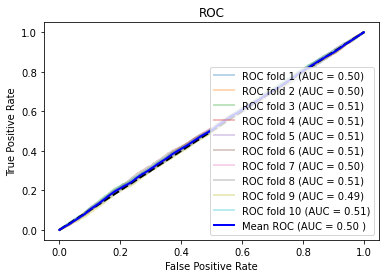

In [98]:
x  = X_rosTrain
y = y_rosTrain
for train,test in kfold.split(x,y):
    model = lr_ros.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [99]:
print(recalls)
print(np.mean(recalls))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [100]:
print(precisions)
print(np.mean(precisions))

[0.4997903815056597, 0.4997903815056597, 0.4997903815056597, 0.4997903815056597, 0.4997903815056597, 0.4998203162434116, 0.4998203162434116, 0.4998203162434116, 0.4998203162434116, 0.49976042165788215]
0.49979935941598275


In [101]:
print(f1scores)
print(np.mean(f1scores))

[0.6664803130740357, 0.6664803130740357, 0.6664803130740357, 0.6664803130740357, 0.6664803130740357, 0.6665069286370353, 0.6665069286370353, 0.6665069286370353, 0.6665069286370353, 0.6664536741214058]
0.6664882954039725


In [102]:
print(aucs)
print(np.mean(aucs))

[0.4960203129411927, 0.5026333535349362, 0.5118563465171748, 0.5062834876001184, 0.5052111383144058, 0.5104901563149873, 0.5047872554522339, 0.5054488654214838, 0.494444719076923, 0.5098068581411196]
0.5046982493314575


Now we have the trained model, let use use test data to report the performance scores:

In [103]:
y_rosPred = lr_ros.predict(X_rosTest)

In [104]:
scores_lr_ros = classification_report(y_rosTest, y_rosPred, labels=[0, 1])
auc_lr_ros = roc_auc_score(y_rosTest, y_rosPred)
print(scores_lr_ros)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     35745
           1       0.50      1.00      0.67     35812

    accuracy                           0.50     71557
   macro avg       0.25      0.50      0.33     71557
weighted avg       0.25      0.50      0.33     71557



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
auc_lr_ros

0.5

### iv) Undersampling: Cluster Centroids:

Since we do not have large enough RAM to use Cluster Centroids Undersamling method, we would skip this part.

### v) Undersampling: TomekLinks:

In [106]:
kfold = StratifiedKFold(n_splits=10)
lr_tl = LogisticRegression(random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

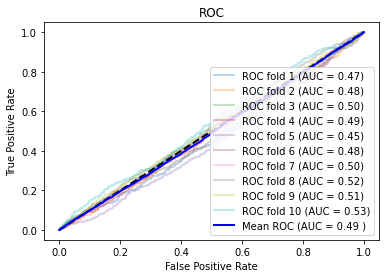

In [107]:
x  = X_tlTrain
y = y_tlTrain
for train,test in kfold.split(x,y):
    model = lr_tl.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [108]:
print(recalls)
print(np.mean(recalls))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [109]:
print(precisions)
print(np.mean(precisions))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [110]:
print(f1scores)
print(np.mean(f1scores))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [111]:
print(aucs)
print(np.mean(aucs))

[0.46523551381152173, 0.48431921234288394, 0.5014794723215387, 0.49489699254892583, 0.445600946680871, 0.48164004385542614, 0.5013989011296188, 0.5213366587258943, 0.5067544189311327, 0.5326853616311076]
0.49353475219789206


Now we have the trained model, let use use test data to report the performance scores:

In [112]:
y_tlPred = lr_tl.predict(X_tlTest)

In [113]:
scores_lr_tl = classification_report(y_tlTest, y_tlPred, labels=[0, 1])
auc_lr_tl = roc_auc_score(y_tlTest, y_tlPred)
print(scores_lr_tl)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34755
           1       0.00      0.00      0.00      1704

    accuracy                           0.95     36459
   macro avg       0.48      0.50      0.49     36459
weighted avg       0.91      0.95      0.93     36459



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
auc_lr_tl

0.5

### vi) Oversampling: SMOTE:

In [115]:
kfold = StratifiedKFold(n_splits=10)
lr_sm = LogisticRegression(random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

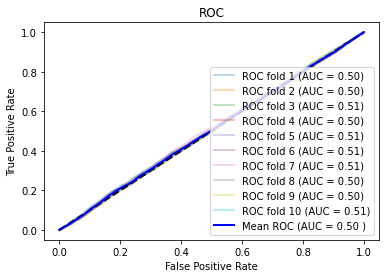

In [116]:
x  = X_smTrain
y = y_smTrain
for train,test in kfold.split(x,y):
    model = lr_sm.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [117]:
print(recalls)
print(np.mean(recalls))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [118]:
print(precisions)
print(np.mean(precisions))

[0.4997903815056597, 0.4997903815056597, 0.4997903815056597, 0.4997903815056597, 0.4997903815056597, 0.4998203162434116, 0.4998203162434116, 0.4998203162434116, 0.4998203162434116, 0.49976042165788215]
0.49979935941598275


In [119]:
print(f1scores)
print(np.mean(f1scores))

[0.6664803130740357, 0.6664803130740357, 0.6664803130740357, 0.6664803130740357, 0.6664803130740357, 0.6665069286370353, 0.6665069286370353, 0.6665069286370353, 0.6665069286370353, 0.6664536741214058]
0.6664882954039725


In [120]:
print(aucs)
print(np.mean(aucs))

[0.49953942354267244, 0.49857522744020444, 0.5073139702118183, 0.5015313044496326, 0.506786848986132, 0.5066243147511099, 0.5084397494328201, 0.49909415526202483, 0.4966640476533667, 0.5068785661250151]
0.5031447607854795


Now we have the trained model, let use use test data to report the performance scores:

In [121]:
y_smPred = lr_sm.predict(X_smTest)

In [122]:
scores_lr_sm = classification_report(y_smTest, y_smPred, labels=[0, 1])
auc_lr_sm = roc_auc_score(y_smTest, y_smPred)
print(scores_lr_sm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     35745
           1       0.50      1.00      0.67     35812

    accuracy                           0.50     71557
   macro avg       0.25      0.50      0.33     71557
weighted avg       0.25      0.50      0.33     71557



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
auc_lr_sm

0.5

### vii) Oversampling: ADASYN

In [124]:
kfold = StratifiedKFold(n_splits=10)
lr_ada = LogisticRegression(random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

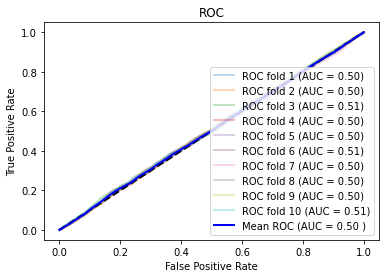

In [125]:
x  = X_adaTrain
y = y_adaTrain
for train,test in kfold.split(x,y):
    model = lr_ada.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [126]:
print(recalls)
print(np.mean(recalls))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [127]:
print(precisions)
print(np.mean(precisions))

[0.4998802825332216, 0.4998802825332216, 0.4998802825332216, 0.4998204237998324, 0.4998204237998324, 0.4998204237998324, 0.4998204237998324, 0.4998204237998324, 0.4998204237998324, 0.49985034420832086]
0.499841373460698


In [128]:
print(f1scores)
print(np.mean(f1scores))

[0.6665602426467654, 0.6665602426467654, 0.6665602426467654, 0.666507024265645, 0.666507024265645, 0.666507024265645, 0.666507024265645, 0.666507024265645, 0.666507024265645, 0.6665336260227499]
0.6665256499556916


In [129]:
print(aucs)
print(np.mean(aucs))

[0.49829038202027864, 0.49961710616939126, 0.5123468587707167, 0.502692704586041, 0.499479810126038, 0.507535178565798, 0.4996870261392008, 0.5044234556258475, 0.5026410654038977, 0.5063942062016005]
0.503310779360881


Now we have the trained model, let use use test data to report the performance scores:

In [130]:
y_adaPred = lr_ada.predict(X_adaTest)

In [131]:
scores_lr_ada = classification_report(y_adaTest, y_adaPred, labels=[0, 1])
auc_lr_ada = roc_auc_score(y_adaTest, y_adaPred)
print(scores_lr_ada)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     35705
           1       0.50      1.00      0.67     35893

    accuracy                           0.50     71598
   macro avg       0.25      0.50      0.33     71598
weighted avg       0.25      0.50      0.33     71598



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
auc_lr_ada

0.5

### viii) Oversampling with undersampling: SMOTETomek

In [135]:
kfold = StratifiedKFold(n_splits=10)
lr_smt = LogisticRegression(random_state=0)

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

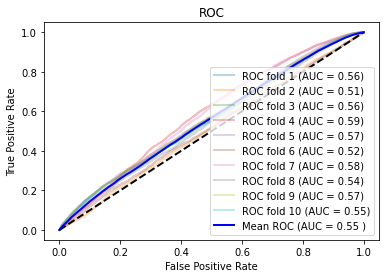

In [136]:
x  = X_smtTrain
y = y_smtTrain
for train,test in kfold.split(x,y):
    model = lr_smt.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [137]:
print(recalls)
print(np.mean(recalls))

[0.3865456486919381, 1.0, 0.3806727175654031, 0.4515483182060865, 0.3888147357180993, 1.0, 0.44607581420181525, 0.37680192205018687, 0.3848104644954618, 0.37199679658302187]
0.5187266417512013


In [138]:
print(precisions)
print(np.mean(precisions))

[0.5466213665534164, 0.49943337110859276, 0.54909510974201, 0.5684758864056461, 0.556340718105424, 0.49943337110859276, 0.5584893048128342, 0.5322398190045249, 0.5543164776004614, 0.5421124294884264]
0.5406557853929929


In [139]:
print(f1scores)
print(np.mean(f1scores))

[0.4528537920250196, 0.6661628062063754, 0.4496295128488097, 0.5033102730045377, 0.45773098680075425, 0.6661628062063754, 0.49599287622439897, 0.4412316348859018, 0.4542661309383125, 0.4412253621467585]
0.5028566181287244


In [140]:
print(aucs)
print(np.mean(aucs))

[0.5567510658325866, 0.512162873851965, 0.5636210741806398, 0.5905040130878362, 0.5669258822141674, 0.5165644259456724, 0.5822259062394392, 0.5419148916655059, 0.5654103845629062, 0.5525971432607976]
0.5548677660841517


Now we have the trained model, let use use test data to report the performance scores:

In [141]:
y_lrSmtPred = lr_smt.predict(X_smtTest)

In [142]:
scores_lr_smt = classification_report(y_smtTest, y_lrSmtPred, labels=[0, 1])
auc_lr_smt= roc_auc_score(y_smtTest, y_lrSmtPred)
print(scores_lr_smt)

              precision    recall  f1-score   support

           0       0.52      0.68      0.59     32060
           1       0.54      0.38      0.45     32230

    accuracy                           0.53     64290
   macro avg       0.53      0.53      0.52     64290
weighted avg       0.53      0.53      0.52     64290



In [143]:
auc_lr_smt

0.5276904690611712

## 2. Naïve Bayes

### i) No rebalancing techniques:

In [144]:
kfold = StratifiedKFold(n_splits=10)
gnb_clf = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

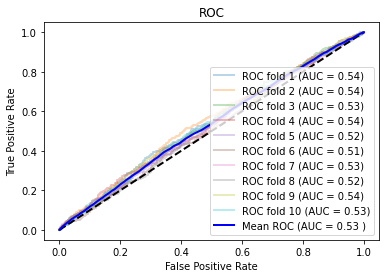

In [145]:
x  = X_train
y = y_train
for train,test in kfold.split(x,y):
    model = gnb_clf.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [146]:
print(recalls)
print(np.mean(recalls))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [147]:
print(precisions)
print(np.mean(precisions))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [148]:
print(f1scores)
print(np.mean(f1scores))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [149]:
print(aucs)
print(np.mean(aucs))

[0.5393007803752832, 0.5440247833837635, 0.5342527629960689, 0.5368766587933701, 0.5240549931868023, 0.5136499307817737, 0.5254381507690042, 0.520357869375631, 0.5360903595490331, 0.5346054581039859]
0.5308651747314717


Now we have the trained model, let use use test data to report the performance scores:

In [151]:
y_gnbPred = gnb_clf.predict(X_test)

In [152]:
scores_gnb = classification_report(y_test, y_gnbPred, labels=[0, 1])
auc_gnb = roc_auc_score(y_test, y_gnbPred)
print(scores_gnb)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35784
           1       0.00      0.00      0.00      1696

    accuracy                           0.95     37480
   macro avg       0.48      0.50      0.49     37480
weighted avg       0.91      0.95      0.93     37480



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
auc_gnb

0.5

### ii) Random Sampling to balance classes via under-sampling:

In [154]:
kfold = StratifiedKFold(n_splits=10)
gnb_rus = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

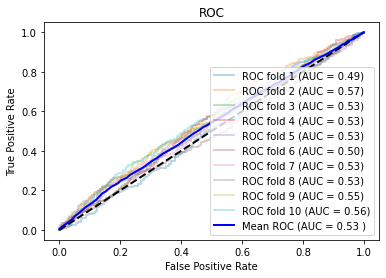

In [155]:
x  = X_rusTrain
y = y_rusTrain
for train,test in kfold.split(x,y):
    model = gnb_rus.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [156]:
print(recalls)
print(np.mean(recalls))

[0.24681933842239187, 0.16793893129770993, 0.17302798982188294, 0.17557251908396945, 0.22137404580152673, 0.22900763358778625, 0.23155216284987276, 0.22646310432569974, 0.24681933842239187, 0.16030534351145037]
0.2078880407124682


In [157]:
print(precisions)
print(np.mean(precisions))

[0.470873786407767, 0.6226415094339622, 0.4892086330935252, 0.5, 0.5838926174496645, 0.5882352941176471, 0.5759493670886076, 0.5493827160493827, 0.5914634146341463, 0.5887850467289719]
0.5560432385003675


In [158]:
print(f1scores)
print(np.mean(f1scores))

[0.323873121869783, 0.26452905811623245, 0.2556390977443609, 0.2598870056497175, 0.32103321033210336, 0.3296703296703296, 0.3303085299455535, 0.3207207207207207, 0.348294434470377, 0.252]
0.3005955508519178


In [159]:
print(aucs)
print(np.mean(aucs))

[0.49329602203143535, 0.5651202781849447, 0.5261718477343537, 0.5323650162126491, 0.5312672517180331, 0.4954915510206672, 0.534915890934242, 0.5301567963044044, 0.5458396946564885, 0.5589758269720102]
0.5313600175769229


Now we have the trained model, let use use test data to report the performance scores:

In [160]:
y_gnbRusPred = gnb_rus.predict(X_rusTest)

In [161]:
scores_gnb_rus = classification_report(y_rusTest, y_gnbRusPred, labels=[0, 1])
auc_gnb_rus = roc_auc_score(y_rusTest, y_gnbRusPred)
print(scores_gnb_rus)

              precision    recall  f1-score   support

           0       0.50      0.88      0.63      1662
           1       0.55      0.15      0.23      1740

    accuracy                           0.50      3402
   macro avg       0.52      0.51      0.43      3402
weighted avg       0.52      0.50      0.43      3402



In [162]:
auc_gnb_rus

0.5112888501597577

### iii) Random Sampling to Balance Classes via Over-Sampling:

In [163]:
kfold = StratifiedKFold(n_splits=10)
gnb_ros = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

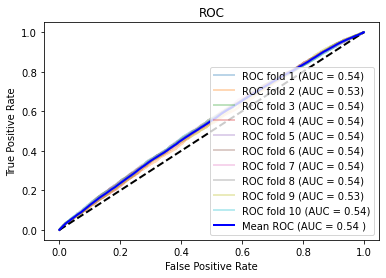

In [164]:
x  = X_rosTrain
y = y_rosTrain
for train,test in kfold.split(x,y):
    model = gnb_ros.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [165]:
print(recalls)
print(np.mean(recalls))

[0.3841821449970042, 0.3839424805272618, 0.3742360695026962, 0.3769922109047334, 0.38214499700419413, 0.3695626123427202, 0.3732774116237268, 0.3941282204913122, 0.3731575793888556, 0.3716442953020134]
0.3783268022084518


In [166]:
print(precisions)
print(np.mean(precisions))

[0.5333555148893695, 0.5219091057175436, 0.5324808184143223, 0.5286506469500925, 0.5375927174645988, 0.5382198952879581, 0.5382754449628477, 0.5392687325791113, 0.5294117647058824, 0.5400557297109021]
0.5339220370682628


In [167]:
print(f1scores)
print(np.mean(f1scores))

[0.44664251880746725, 0.44241922120961064, 0.4395496129486277, 0.4401231113598209, 0.4467325068291658, 0.4382238010657194, 0.44084347579960376, 0.4554140127388535, 0.43775919027201793, 0.4402953286951583]
0.4428002779726046


In [168]:
print(aucs)
print(np.mean(aucs))

[0.5357936962964494, 0.5285877644860413, 0.5434193135357626, 0.5361295049000365, 0.5415931775973407, 0.5419148863965015, 0.5443244599459931, 0.5401295138070024, 0.5349205926694844, 0.5411756859266116]
0.5387988595561224


Now we have the trained model, let use use test data to report the performance scores:

In [169]:
y_gnbRosPred = gnb_ros.predict(X_rosTest)

In [170]:
scores_gnb_ros = classification_report(y_rosTest, y_gnbRosPred, labels=[0, 1])
auc_gnb_ros = roc_auc_score(y_rosTest, y_gnbRosPred)
print(scores_gnb_ros)

              precision    recall  f1-score   support

           0       0.52      0.67      0.59     35745
           1       0.53      0.37      0.44     35812

    accuracy                           0.52     71557
   macro avg       0.53      0.52      0.51     71557
weighted avg       0.53      0.52      0.51     71557



In [171]:
auc_gnb_ros

0.5230539464754603

### iv) Undersampling: Cluster Centroids:

We skip this step since the RAM required are not available.

### v) Undersampling: TomekLinks:

In [172]:
kfold = StratifiedKFold(n_splits=10)
gnb_tl = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

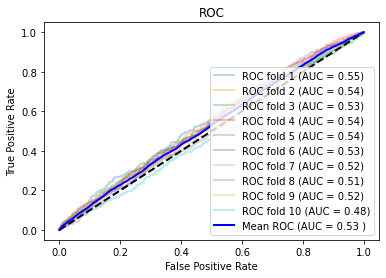

In [173]:
x  = X_tlTrain
y = y_tlTrain
for train,test in kfold.split(x,y):
    model = gnb_tl.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [174]:
print(recalls)
print(np.mean(recalls))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [175]:
print(precisions)
print(np.mean(precisions))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [176]:
print(f1scores)
print(np.mean(f1scores))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [177]:
print(aucs)
print(np.mean(aucs))

[0.5504406037940744, 0.5447070258745761, 0.5344173456921577, 0.5438516990871736, 0.5373553811415456, 0.5309857842573927, 0.5234433963729201, 0.5085449751061444, 0.5194498193914283, 0.4831144365977904]
0.5276310467315203


Now we have the trained model, let use use test data to report the performance scores:

In [180]:
y_gnbTlPred = gnb_tl.predict(X_tlTest)

In [181]:
scores_gnb_tl = classification_report(y_tlTest, y_gnbTlPred, labels=[0, 1])
auc_gnb_tl = roc_auc_score(y_tlTest, y_gnbTlPred)
print(scores_gnb_tl)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34755
           1       0.00      0.00      0.00      1704

    accuracy                           0.95     36459
   macro avg       0.48      0.50      0.49     36459
weighted avg       0.91      0.95      0.93     36459



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
auc_gnb_tl

0.5

### vi) Oversampling: SMOTE:

In [183]:
kfold = StratifiedKFold(n_splits=10)
gnb_sm = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

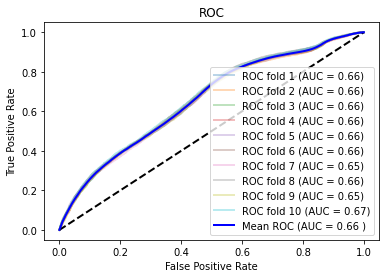

In [184]:
x  = X_smTrain
y = y_smTrain
for train,test in kfold.split(x,y):
    model = gnb_sm.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [185]:
print(recalls)
print(np.mean(recalls))

[0.902336728579988, 0.8895146794487717, 0.8953864589574596, 0.8955062911923307, 0.8980227681246256, 0.9086878370281606, 0.8969442780107849, 0.8985020970641102, 0.8985020970641102, 0.9062799616490892]
0.8989683197119431


In [186]:
print(precisions)
print(np.mean(precisions))

[0.5383570458282692, 0.5312768393930719, 0.5311344896218368, 0.5299624140131906, 0.5333048676345005, 0.5378777131508016, 0.5321342243708233, 0.5329447721941858, 0.5341216697535262, 0.5376084174605431]
0.5338722453420749


In [187]:
print(f1scores)
print(np.mean(f1scores))

[0.6743686190220313, 0.6652327821839853, 0.6667559005934056, 0.6658647420475808, 0.6691967674242086, 0.6757563605578578, 0.6679755477221008, 0.6690461318818595, 0.6699727471741946, 0.6748772869254797]
0.6699046885532705


In [188]:
print(aucs)
print(np.mean(aucs))

[0.655390169280249, 0.6565581174860942, 0.6560346405836427, 0.6554827838726931, 0.6557761518930969, 0.6632847219496824, 0.6518831533111458, 0.659790358878961, 0.6516846861047629, 0.6668840751653975]
0.6572768858525725


Now we have the trained model, let use use test data to report the performance scores:

In [189]:
y_gnbSmPred = gnb_sm.predict(X_smTest)

In [190]:
scores_gnb_sm = classification_report(y_smTest, y_gnbSmPred, labels=[0, 1])
auc_gnb_sm= roc_auc_score(y_smTest, y_gnbSmPred)
print(scores_gnb_sm)

              precision    recall  f1-score   support

           0       0.70      0.22      0.33     35745
           1       0.54      0.91      0.67     35812

    accuracy                           0.56     71557
   macro avg       0.62      0.56      0.50     71557
weighted avg       0.62      0.56      0.50     71557



In [191]:
auc_gnb_sm

0.5609919984059994

### vii) Oversampling: ADASYN

In [192]:
kfold = StratifiedKFold(n_splits=10)
gnb_ada = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

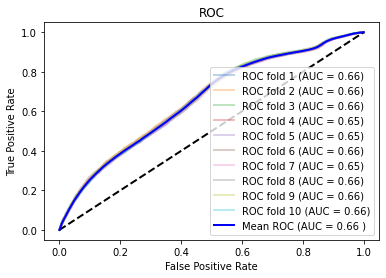

In [193]:
x  = X_adaTrain
y = y_adaTrain
for train,test in kfold.split(x,y):
    model = gnb_ada.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [194]:
print(recalls)
print(np.mean(recalls))

[0.903724104897617, 0.9013291821338761, 0.9038438510358041, 0.8966467065868263, 0.8996407185628742, 0.9, 0.8964071856287426, 0.8996407185628742, 0.904311377245509, 0.8965269461077844]
0.9002070790761907


In [195]:
print(precisions)
print(np.mean(precisions))

[0.5391869686361364, 0.5368758915834522, 0.5343716814159292, 0.5333760775094394, 0.5358059914407989, 0.5349515945330297, 0.534566490501357, 0.5333712013632491, 0.5362164465274819, 0.5362464183381089]
0.5354968761848983


In [196]:
print(f1scores)
print(np.mean(f1scores))

[0.6754071952747449, 0.6729247686737294, 0.6716497597437265, 0.668870326528789, 0.6716137684398749, 0.671042057326547, 0.6697387258410881, 0.6696977801551217, 0.6732346647646219, 0.6710891976692066]
0.6715268244417449


In [197]:
print(aucs)
print(np.mean(aucs))

[0.6550746815315267, 0.6638525822563167, 0.6594917159822253, 0.6548970512780088, 0.6546121113445679, 0.6622236379323689, 0.649473202947862, 0.6558789553492345, 0.6584723516108042, 0.6577494490372936]
0.6571725739270209


Now we have the trained model, let use use test data to report the performance scores:

In [198]:
y_gnbAdaPred = gnb_ada.predict(X_adaTest)

In [199]:
scores_gnb_ada = classification_report(y_adaTest, y_gnbAdaPred, labels=[0, 1])
auc_gnb_ada= roc_auc_score(y_adaTest, y_gnbAdaPred)
print(scores_gnb_ada)

              precision    recall  f1-score   support

           0       0.69      0.22      0.33     35705
           1       0.54      0.90      0.67     35893

    accuracy                           0.56     71598
   macro avg       0.61      0.56      0.50     71598
weighted avg       0.61      0.56      0.50     71598



In [200]:
auc_gnb_ada

0.5601683285786252

### viii) Oversampling with undersampling: SMOTETomek

In [201]:
kfold = StratifiedKFold(n_splits=10)
gnb_smt = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

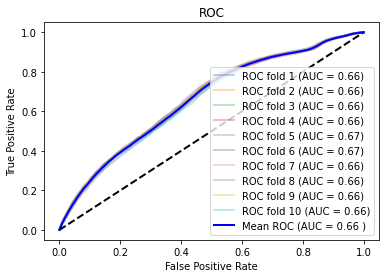

In [202]:
x  = X_smtTrain
y = y_smtTrain
for train,test in kfold.split(x,y):
    model = gnb_smt.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [203]:
print(recalls)
print(np.mean(recalls))

[0.891884676988788, 0.8909503470368393, 0.8916177255739456, 0.8954885210891618, 0.8930859583555792, 0.8952215696743193, 0.8853443673251469, 0.8894821142552055, 0.8902829684997331, 0.8949546182594768]
0.8918312867058195


In [204]:
print(precisions)
print(np.mean(precisions))

[0.5400468762628303, 0.5394811282631536, 0.5420757932321675, 0.5480761375704599, 0.5427041933652365, 0.5409307202193725, 0.5391367959034382, 0.543334692213616, 0.5402997164844067, 0.5459653122709877]
0.542205136578567


In [205]:
print(f1scores)
print(np.mean(f1scores))

[0.6727410017618928, 0.6720362446513969, 0.6742366893767349, 0.6799777023260527, 0.6751425256041571, 0.6743753456337037, 0.670169234655216, 0.6745963455990283, 0.6724807178504814, 0.6781975421028676]
0.6743953349561532


In [206]:
print(aucs)
print(np.mean(aucs))

[0.6553336743371916, 0.659821934980746, 0.663980514715319, 0.6644078360638882, 0.6659159569115034, 0.6686345312480335, 0.6582464808024995, 0.655019138094973, 0.6640841810258371, 0.657276902171923]
0.6612721150351915


Now we have the trained model, let use use test data to report the performance scores:

In [207]:
y_gnbSmtPred = gnb_smt.predict(X_smtTest)

In [208]:
scores_gnb_smt = classification_report(y_smtTest, y_gnbSmtPred, labels=[0, 1])
auc_gnb_smt= roc_auc_score(y_smtTest, y_gnbSmtPred)
print(scores_gnb_smt)

              precision    recall  f1-score   support

           0       0.70      0.25      0.37     32060
           1       0.54      0.89      0.68     32230

    accuracy                           0.57     64290
   macro avg       0.62      0.57      0.52     64290
weighted avg       0.62      0.57      0.52     64290



In [209]:
auc_gnb_smt

0.5712335930013323

## 3. Random Forest

### i) No rebalancing techniques:

In [210]:
kfold = StratifiedKFold(n_splits=10)
rf_clf = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

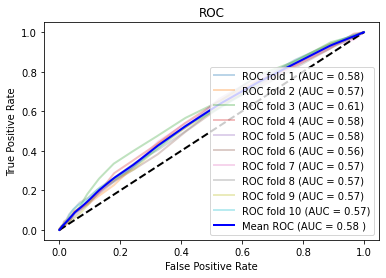

In [211]:
x  = X_train
y = y_train
for train,test in kfold.split(x,y):
    model = rf_clf.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [212]:
print(recalls)
print(np.mean(recalls))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [213]:
print(precisions)
print(np.mean(precisions))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [214]:
print(f1scores)
print(np.mean(f1scores))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [215]:
print(aucs)
print(np.mean(aucs))

[0.5777345941494728, 0.5721639234845914, 0.6060924712053386, 0.5815088366389513, 0.5774850369143758, 0.5589917915752909, 0.5723437581091536, 0.5656401391165723, 0.5696454297364384, 0.5738946921019378]
0.5755500673032122


Now we have the trained model, let use use test data to report the performance scores:

In [216]:
y_rfPred = rf_clf.predict(X_test)

In [217]:
scores_rf = classification_report(y_test, y_rfPred, labels=[0, 1])
auc_rf = roc_auc_score(y_test, y_rfPred)
print(scores_rf)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35784
           1       0.00      0.00      0.00      1696

    accuracy                           0.95     37480
   macro avg       0.48      0.50      0.49     37480
weighted avg       0.91      0.95      0.93     37480



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
auc_rf

0.5

### ii) Random Sampling to Balance Classes via Under-Sampling:

In [219]:
kfold = StratifiedKFold(n_splits=10)
rf_rus = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

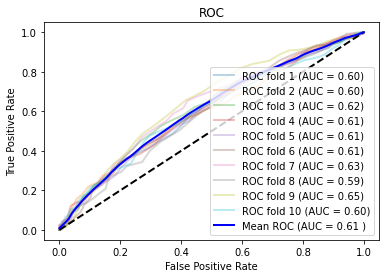

In [220]:
x  = X_rusTrain
y = y_rusTrain
for train,test in kfold.split(x,y):
    model = rf_rus.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [221]:
print(recalls)
print(np.mean(recalls))

[0.5216284987277354, 0.5139949109414759, 0.55470737913486, 0.539440203562341, 0.5241730279898219, 0.5190839694656488, 0.5877862595419847, 0.5063613231552163, 0.5648854961832062, 0.5368956743002544]
0.5368956743002544


In [222]:
print(precisions)
print(np.mean(precisions))

[0.5631868131868132, 0.5787965616045845, 0.5956284153005464, 0.5714285714285714, 0.5706371191135734, 0.5828571428571429, 0.6062992125984252, 0.5558659217877095, 0.6183844011142061, 0.5749318801089919]
0.5818016039100564


In [223]:
print(f1scores)
print(np.mean(f1scores))

[0.5416116248348745, 0.5444743935309972, 0.5744400527009222, 0.5549738219895289, 0.5464190981432361, 0.5491251682368776, 0.5968992248062016, 0.529960053262317, 0.5904255319148936, 0.5552631578947368]
0.5583592127314585


In [224]:
print(aucs)
print(np.mean(aucs))

[0.5971489850437519, 0.5973203124504262, 0.617603573762794, 0.6053504914558387, 0.6067115925199724, 0.6065370923835448, 0.6272899176993902, 0.5879131687321137, 0.6492143765903308, 0.6030693384223919]
0.6098158849060555


Now we have the trained model, let use use test data to report the performance scores:

In [225]:
y_rfRusPred = rf_rus.predict(X_rusTest)

In [226]:
scores_rf_rus = classification_report(y_rusTest, y_rfRusPred, labels=[0, 1])
auc_rf_rus = roc_auc_score(y_rusTest, y_rfRusPred)
print(scores_rf_rus)

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1662
           1       0.58      0.55      0.56      1740

    accuracy                           0.57      3402
   macro avg       0.57      0.57      0.57      3402
weighted avg       0.57      0.57      0.57      3402



In [227]:
auc_rf_rus

0.5657216067056724

### iii) Random Sampling to Balance Classes via Over-Sampling:

In [228]:
kfold = StratifiedKFold(n_splits=10)
rf_ros = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

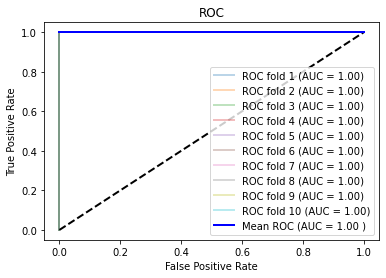

In [229]:
x  = X_rosTrain
y = y_rosTrain
for train,test in kfold.split(x,y):
    model = rf_ros.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [230]:
print(recalls)
print(np.mean(recalls))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


In [231]:
print(precisions)
print(np.mean(precisions))

[0.9998801821231728, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.9999880182123173


In [232]:
print(f1scores)
print(np.mean(f1scores))

[0.9999400874722905, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.999994008747229


In [233]:
print(aucs)
print(np.mean(aucs))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


Now we have the trained model, let use use test data to report the performance scores:

In [234]:
y_rfRosPred = rf_ros.predict(X_rosTest)

In [235]:
scores_rf_ros = classification_report(y_rosTest, y_rfRosPred, labels=[0, 1])
auc_rf_ros = roc_auc_score(y_rosTest, y_rfRosPred)
print(scores_rf_ros)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35745
           1       1.00      1.00      1.00     35812

    accuracy                           1.00     71557
   macro avg       1.00      1.00      1.00     71557
weighted avg       1.00      1.00      1.00     71557



In [236]:
auc_rf_ros

1.0

### iv) Undersampling: Cluster Centroids:

We skip this step since the RAM required are not available.

### v) Undersampling: TomekLinks:

In [237]:
kfold = StratifiedKFold(n_splits=10)
rf_tl = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

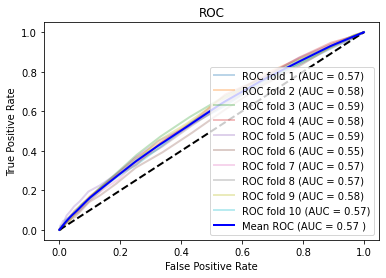

In [238]:
x  = X_tlTrain
y = y_tlTrain
for train,test in kfold.split(x,y):
    model = rf_tl.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [239]:
print(recalls)
print(np.mean(recalls))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [240]:
print(precisions)
print(np.mean(precisions))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [241]:
print(f1scores)
print(np.mean(f1scores))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
0.0


In [242]:
print(aucs)
print(np.mean(aucs))

[0.5693494867302042, 0.5846185315116396, 0.5912450232817634, 0.5830827382930548, 0.5892981268266624, 0.5458551652809139, 0.5684546863498433, 0.5653433426407054, 0.5794915317408305, 0.5702446785985628]
0.574698331125418


Now we have the trained model, let use use test data to report the performance scores:

In [243]:
y_rfTlPred = rf_tl.predict(X_tlTest)

In [244]:
scores_rf_tl = classification_report(y_tlTest, y_rfTlPred, labels=[0, 1])
auc_rf_tl = roc_auc_score(y_tlTest, y_rfTlPred)
print(scores_rf_tl)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     34755
           1       0.00      0.00      0.00      1704

    accuracy                           0.95     36459
   macro avg       0.48      0.50      0.49     36459
weighted avg       0.91      0.95      0.93     36459



C:\Users\wendy\Download\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [245]:
auc_rf_tl

0.5

### vi) Oversampling: SMOTE:

In [246]:
kfold = StratifiedKFold(n_splits=10)
rf_sm = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

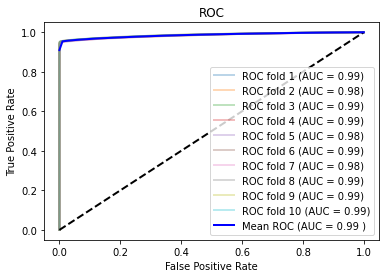

In [247]:
x  = X_smTrain
y = y_smTrain
for train,test in kfold.split(x,y):
    model = rf_sm.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [248]:
print(recalls)
print(np.mean(recalls))

[0.949550629119233, 0.9505092869982025, 0.950868783702816, 0.9469143199520671, 0.9452366686638706, 0.951467944877172, 0.9478729778310365, 0.9476333133612942, 0.9505092869982025, 0.9521812080536913]
0.9492744419557585


In [249]:
print(precisions)
print(np.mean(precisions))

[0.9978592116861856, 0.9977358490566037, 0.997736703130894, 0.9978532643010481, 0.9970926557957275, 0.9987421383647799, 0.9983592073709453, 0.9982327695026508, 0.9988666414809217, 0.9982409850483729]
0.9980719425738129


In [250]:
print(f1scores)
print(np.mean(f1scores))

[0.9731057349871056, 0.9735501687634244, 0.9737391090931403, 0.9717166748647319, 0.9704724409448818, 0.9745320650506292, 0.9724612736660928, 0.9722751582959365, 0.9740881738916861, 0.9746672391584371]
0.9730608038716066


In [251]:
print(aucs)
print(np.mean(aucs))

[0.9855694771572672, 0.9848878667566556, 0.9857949732443545, 0.985056761051769, 0.9841782567623718, 0.9864976363949052, 0.9843806265528345, 0.9851905452352336, 0.986683870697417, 0.9865272738251359]
0.9854767287677945


Now we have the trained model, let use use test data to report the performance scores:

In [252]:
y_rfSmPred = rf_sm.predict(X_smTest)

In [253]:
scores_rf_sm = classification_report(y_smTest, y_rfSmPred, labels=[0, 1])
auc_rf_sm= roc_auc_score(y_smTest, y_rfSmPred)
print(scores_rf_sm)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     35745
           1       1.00      0.95      0.97     35812

    accuracy                           0.97     71557
   macro avg       0.98      0.97      0.97     71557
weighted avg       0.98      0.97      0.97     71557



In [254]:
auc_rf_sm

0.9739877001322257

### vii) Oversampling: ADASYN

In [255]:
kfold = StratifiedKFold(n_splits=10)
rf_ada = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

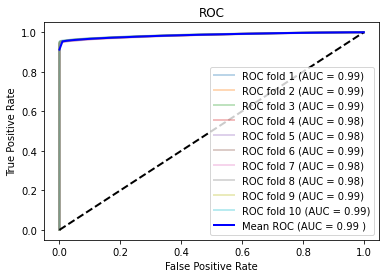

In [256]:
x  = X_adaTrain
y = y_adaTrain
for train,test in kfold.split(x,y):
    model = rf_ada.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [257]:
print(recalls)
print(np.mean(recalls))

[0.9523410370015567, 0.950425098790564, 0.9515028140342474, 0.945748502994012, 0.9447904191616766, 0.9511377245508982, 0.947185628742515, 0.9469461077844311, 0.9513772455089821, 0.9525748502994011]
0.9494029428868285


In [258]:
print(precisions)
print(np.mean(precisions))

[0.9984934086629002, 0.9976118652589241, 0.9982412060301508, 0.9977258370183196, 0.9981022267206477, 0.9986168741355463, 0.9978551602321474, 0.9982325463956571, 0.9981153411232567, 0.9984935977906101]
0.9981488063368159


In [259]:
print(f1scores)
print(np.mean(f1scores))

[0.9748712919833292, 0.973446985956951, 0.9743118141131752, 0.9710421149707962, 0.970714900947459, 0.9742992087345888, 0.9718604079626444, 0.9719132198389773, 0.9741860322521309, 0.9749938710468252]
0.9731639847806877


In [260]:
print(aucs)
print(np.mean(aucs))

[0.9867240516532241, 0.9855426854135659, 0.985490057308309, 0.9849999570031788, 0.9846835863935125, 0.9855096198221078, 0.9840474699237237, 0.9849313054121532, 0.9861048606473028, 0.9864095435699517]
0.985444313714703


Now we have the trained model, let use use test data to report the performance scores:

In [261]:
y_rfAdaPred = rf_ada.predict(X_adaTest)

In [262]:
scores_rf_ada = classification_report(y_adaTest, y_rfAdaPred, labels=[0, 1])
auc_rf_ada= roc_auc_score(y_adaTest, y_rfAdaPred)
print(scores_rf_ada)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     35705
           1       1.00      0.95      0.97     35893

    accuracy                           0.97     71598
   macro avg       0.97      0.97      0.97     71598
weighted avg       0.97      0.97      0.97     71598



In [263]:
auc_rf_ada

0.9737513675378796

### viii) Oversampling with undersampling: SMOTETomek

In [266]:
kfold = StratifiedKFold(n_splits=10)
rf_smt = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

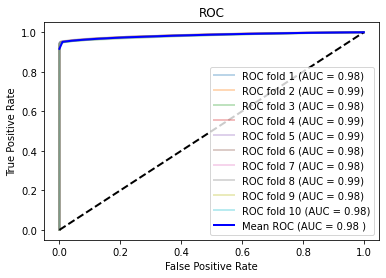

In [267]:
x  = X_smtTrain
y = y_smtTrain
for train,test in kfold.split(x,y):
    model = rf_smt.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [268]:
print(recalls)
print(np.mean(recalls))

[0.9471436198611852, 0.9450080085424453, 0.942738921516284, 0.9468766684463428, 0.945942338494394, 0.9468766684463428, 0.945942338494394, 0.949679658302189, 0.9442071542979178, 0.9466097170315003]
0.9461025093432994


In [269]:
print(precisions)
print(np.mean(precisions))

[0.9983117613956106, 0.9977452085682075, 0.999009900990099, 0.9977496483825598, 0.9985909539241933, 0.9974690663667042, 0.9985909539241933, 0.9976163768928772, 0.9983065198983911, 0.9977490151941475]
0.9981139405536983


In [270]:
print(f1scores)
print(np.mean(f1scores))

[0.9720547945205479, 0.9706608171099534, 0.9700590578217279, 0.9716477194904807, 0.971553910480499, 0.9715146535195837, 0.971553910480499, 0.9730579868708973, 0.9705034984222801, 0.9715068493150685]
0.9714113198031538


In [271]:
print(aucs)
print(np.mean(aucs))

[0.9834634192661634, 0.9851652389796419, 0.9818672922622769, 0.9856090648154053, 0.985255182657835, 0.9847625366022776, 0.9837167102626875, 0.9861124205678227, 0.9837812439630194, 0.9835149413513892]
0.9843248050728519


Now we have the trained model, let use use test data to report the performance scores:

In [272]:
y_rfSmtPred = rf_smt.predict(X_smtTest)

In [273]:
scores_rf_smt = classification_report(y_smtTest, y_rfSmtPred, labels=[0, 1])
auc_rf_smt= roc_auc_score(y_smtTest, y_rfSmtPred)
print(scores_rf_smt)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     32060
           1       1.00      0.94      0.97     32230

    accuracy                           0.97     64290
   macro avg       0.97      0.97      0.97     64290
weighted avg       0.97      0.97      0.97     64290



In [274]:
auc_rf_smt

0.9711718099924727

## (iv) Balanced Random Forest

In [275]:
kfold = StratifiedKFold(n_splits=10)
brf_clf = BalancedRandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

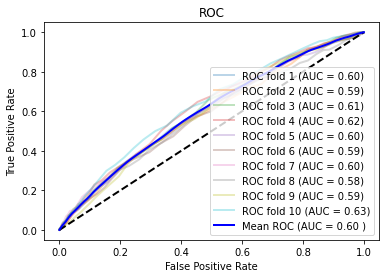

In [276]:
x  = X_train
y = y_train
for train,test in kfold.split(x,y):
    model = brf_clf.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [277]:
print(recalls)
print(np.mean(recalls))

[0.5452261306532663, 0.5541561712846348, 0.5491183879093199, 0.5994962216624685, 0.5440806045340051, 0.5264483627204031, 0.5541561712846348, 0.5452261306532663, 0.535175879396985, 0.592964824120603]
0.5546048884219588


In [278]:
print(precisions)
print(np.mean(precisions))

[0.06037840845854201, 0.058886509635974305, 0.0598736610821203, 0.06441136671177267, 0.05995004163197336, 0.057354555433589464, 0.06002728512960437, 0.05845905172413793, 0.059331476323119775, 0.06623631770979511]
0.06049086738406293


In [279]:
print(f1scores)
print(np.mean(f1scores))

[0.10871743486973946, 0.10646019840309703, 0.10797424467558196, 0.1163245356793744, 0.10800000000000001, 0.1034397426379609, 0.10832102412604627, 0.10559610705596106, 0.10682046138415245, 0.11916182782125727]
0.10908155766531709


In [280]:
print(aucs)
print(np.mean(aucs))

[0.5973804696698635, 0.5886047609104701, 0.6050332271625114, 0.6189492890497611, 0.5971929203091224, 0.5851334397053127, 0.6006708797051196, 0.5816840281435932, 0.5921430562420346, 0.6316654254861225]
0.5998457496383911


Now we have the trained model, let use use test data to report the performance scores:

In [281]:
y_brfPred = brf_clf.predict(X_test)

In [282]:
scores_brf = classification_report(y_test, y_brfPred, labels=[0, 1])
auc_brf = roc_auc_score(y_test, y_brfPred)
print(scores_brf)

              precision    recall  f1-score   support

           0       0.96      0.58      0.73     35784
           1       0.06      0.55      0.11      1696

    accuracy                           0.58     37480
   macro avg       0.51      0.57      0.42     37480
weighted avg       0.92      0.58      0.70     37480



In [283]:
auc_brf

0.5664839403296087

## (v) AdaBoost with random undersampling

In [284]:
kfold = StratifiedKFold(n_splits=10)
rusBc_clf = RUSBoostClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

recalls =[]
precisions =[]
f1scores =[]

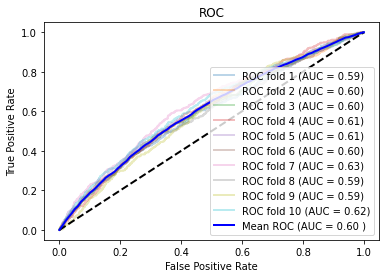

In [285]:
x  = X_train
y = y_train
for train,test in kfold.split(x,y):
    model = rusBc_clf.fit(x.iloc[train],y.iloc[train])
    pred_prob = model.predict_proba(x.iloc[test])
    pred = model.predict(x.iloc[test])

    #prediction = m_rfc.fit(x[train],y[train]).predict_proba(x[test])
    fpr, tpr, t = roc_curve(y.iloc[test], pred_prob[:, 1])
    recalls.append(recall_score(y.iloc[test], pred))
    precisions.append(precision_score(y.iloc[test], pred))
    f1scores.append(sklearn.metrics.f1_score(y.iloc[test], pred))
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = sklearn.metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [286]:
print(recalls)
print(np.mean(recalls))

[0.5301507537688442, 0.5440806045340051, 0.5390428211586902, 0.5541561712846348, 0.5591939546599496, 0.5440806045340051, 0.6045340050377834, 0.5226130653266332, 0.5226130653266332, 0.585427135678392]
0.5505892181309571


In [287]:
print(precisions)
print(np.mean(precisions))

[0.059120201737181285, 0.06178489702517163, 0.0626830697129467, 0.06266021076616349, 0.06373815676141258, 0.06178489702517163, 0.0686106346483705, 0.059873344847438115, 0.05927614705044172, 0.06450719822812846]
0.06240387578024261


In [288]:
print(f1scores)
print(np.mean(f1scores))

[0.10637761532644317, 0.11096840482918058, 0.11230648123852009, 0.11258955987717502, 0.11443298969072166, 0.11096840482918058, 0.12323491655969193, 0.10743801652892562, 0.10647555669311493, 0.11620947630922694]
0.11210014218821807


In [289]:
print(aucs)
print(np.mean(aucs))

[0.5906168961722845, 0.6048340814373252, 0.5990715283167117, 0.6076108064919092, 0.6108967109574805, 0.6012901927368537, 0.6292867626026053, 0.5874076564685173, 0.5915675177131614, 0.6195998863371609]
0.604218203923401


Now we have the trained model, let use use test data to report the performance scores:

In [290]:
y_rusBcPred = rusBc_clf.predict(X_test)

In [291]:
scores_rusBc = classification_report(y_test, y_rusBcPred, labels=[0, 1])
auc_rusBc = roc_auc_score(y_test, y_rusBcPred)
print(scores_rusBc)

              precision    recall  f1-score   support

           0       0.97      0.59      0.74     35784
           1       0.06      0.55      0.11      1696

    accuracy                           0.59     37480
   macro avg       0.51      0.57      0.42     37480
weighted avg       0.92      0.59      0.71     37480



In [292]:
auc_rusBc

0.5724013235598074